[문제] https://certi.multicampus.com/ie/intro/sampleTest?p_menu=MTMxMDkjTUFJTg==&p_gubun=Qw==#Lnk

## 데이터 읽기 & 둘러보기

In [1]:
import pandas as pd
path1 = '/content/01_ADS_Sample_1.csv'      
df = pd.read_csv(path1)
df.head()

,YEAR_MONTH,SOCIAL,TV,NEWSPAPER,SALES_AMT
0,2005-Dec,84.72,19.20,48.96,14.28
1,2006-Jan,351.48,33.96,51.84,11.52
2,2006-Feb,135.48,20.88,46.32,20.88
3,2006-Mar,116.64,1.80,36.00,11.40
4,2006-Apr,318.72,24.00,0.36,15.36


## 문제1) 
년월(YEAR_MONTH) 변수를 제외한 변수들에 대해 상관분석을 수행하고자 한다. 매출금액(SALES_AMT)과 상관 정도가 가장 강한(상관계수 절대값이 가장 큰) 변수를 찾고 해당 변수와 매출금액(SALES_AMT)과의 상관계수 값을 기술하시오. 

In [2]:
df.corr()

<ipython-input-2-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SOCIAL,TV,NEWSPAPER,SALES_AMT
SOCIAL,1.000000,0.081734,0.102198,0.037020
TV,0.081734,1.000000,0.280012,-0.183192
NEWSPAPER,0.102198,0.280012,1.000000,0.002282
SALES_AMT,0.037020,-0.183192,0.002282,1.000000


<Axes: xlabel='TV', ylabel='SALES_AMT'>

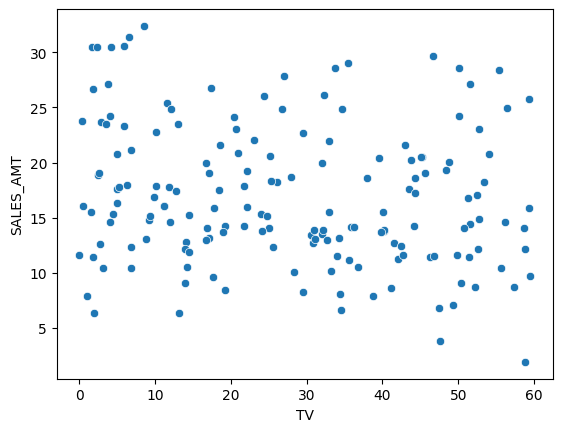

In [3]:
# 산점도.. 
import seaborn as sns
sns.scatterplot(x=df.TV, y=df.SALES_AMT )

In [4]:
from scipy.stats import pearsonr
pearsonr(df.TV, df.SALES_AMT )

PearsonRResult(statistic=-0.1831919052011433, pvalue=0.017124163463347077)

In [ ]:
# 답 : -0.183

## 문제2)
2009년 매출금액(SALES_AMT) 대비 2019년 매출금액(SALES_AMT)의 변화 정도를 확인하고자 한다. 다음 수식을 이용하여 증감률(%)을 기술하시오.

In [8]:
df_2019 = df[df['YEAR_MONTH'].str.startswith('2019')]
df_2009 = df[df['YEAR_MONTH'].str.startswith('2009')]

total2019 = df_2019.sum()
total2009 = df_2009.sum()

per = (total2019.SALES_AMT - total2009.SALES_AMT) / total2009.SALES_AMT * 100
per

0.19379844961241044

In [ ]:
# 답 : 0.1937 %

## 문제3) 
2009년과 2019년의 매출금액(SALES_AMT) 평균이 통계적으로 유의한 차이가 있는지 검정하고자 한다. 적절한 검정 수행 후, 유의 확률(P-value)의 값을 기술하시오.

단, 검정 시 세운 대립 가설(H₁)은 다음과 같다.
대립 가설(H₁): 2009년과 2019년의 매출금액의 평균이 같지 않다

In [10]:
# 귀무가설 (H0) : 같다
# 대립 가설(H₁): 2009년과 2019년의 매출금액의 평균이 같지 않다
from scipy.stats import ttest_ind
ttest_ind(df_2019.SALES_AMT, df_2009.SALES_AMT)

Ttest_indResult(statistic=0.011021647568416794, pvalue=0.9913055138582367)

In [ ]:
#p-value가 0.991로 유의수준 0.05보다 크므로 귀무가설 채택 즉. 평균이 같다고 할 수 있다.

In [ ]:
#답 : 0.991